<h1>Knn on human activity recognition </h1>

<b>Introduction : </b>

In this notebook, we explore the use of the K-Nearest Neighbors (KNN) algorithm for HAR. KNN is a simple yet effective algorithm for classification tasks, relying on the similarity of data points to determine the class of new instances. We aim to evaluate and optimize KNN for accurately identifying various human activities, leveraging different values of K and considering the impact of feature scaling and distance metrics.

<b>Notebook content: </b>
- Data preprocessing the preparation
- The visualization
- Split data train and test
- Train knn on the data without date
- Using Timestamp in ANN
- Using timestamp
- Evaluation and results analysis
- Hyper parameter tuning
- Conclusion
- Appendix 

<h3>Data preprocessing the preparation </h3>

In [1]:
#imports 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt

Merging all the datasets we have of 22 participants 

In [2]:
all_dataframes = [pd.read_csv(f) for f in ['data/harth/S006.csv', 'data/harth/S008.csv','data/harth/S009.csv','data/harth/S010.csv','data/harth/S012.csv','data/harth/S013.csv','data/harth/S014.csv','data/harth/S015.csv','data/harth/S016.csv','data/harth/S017.csv','data/harth/S018.csv','data/harth/S019.csv','data/harth/S020.csv','data/harth/S021.csv','data/harth/S022.csv','data/harth/S023.csv','data/harth/S024.csv','data/harth/S025.csv','data/harth/S026.csv','data/harth/S027.csv','data/harth/S028.csv','data/harth/S029.csv']]
final_df = pd.concat(all_dataframes, ignore_index=True)

In [3]:
final_df

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,index,Unnamed: 0
0,2019-01-12 00:00:00.000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6,NaN,NaN
1,2019-01-12 00:00:00.010,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6,NaN,NaN
2,2019-01-12 00:00:00.020,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6,NaN,NaN
3,2019-01-12 00:00:00.030,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6,NaN,NaN
4,2019-01-12 00:00:00.040,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6461323,2019-01-12 00:59:56.940,-1.012939,-0.110840,-0.218994,-0.970215,-0.313232,0.124268,3,NaN,NaN
6461324,2019-01-12 00:59:56.960,-0.979492,-0.089355,-0.216553,-0.966553,-0.234619,0.113770,3,NaN,NaN
6461325,2019-01-12 00:59:56.980,-0.969971,-0.057861,-0.204590,-0.997803,-0.097656,0.065186,3,NaN,NaN
6461326,2019-01-12 00:59:57.000,-1.001953,-0.029785,-0.234863,-1.000000,-0.145996,0.061523,3,NaN,NaN


In [4]:
final_df.shape

(6461328, 10)

The dataset consist of : 
- A list of features :timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,index,Unnamed: 0
- Target with 12 values 
- 6461328 rows 
- 9 columns 


In [5]:
final_df['label'].value_counts()

label
7      2902703
1      1197155
6       743480
8       428898
13      393963
2       291356
3       254839
4        76217
5        67253
14       55814
130      41785
140       7865
Name: count, dtype: int64

<b>The target ("label") has 12 different values ,and indicate a significant class imbalance, with label 7 being the most frequent and label 140 being the least frequent.</b>

In [6]:
#handle the date convert it to datetime 
final_df['timestamp'] = pd.to_datetime(final_df['timestamp'])

In [7]:
#remove the unnecessary columns 
final_df=final_df.drop(["index","Unnamed: 0"],axis=1)

In [8]:
#dataset without timestamp 
final_df_without_date=final_df.drop(["timestamp"],axis=1)
final_df_without_date

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6
1,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6
2,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6
3,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6
4,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6
...,...,...,...,...,...,...,...
6461323,-1.012939,-0.110840,-0.218994,-0.970215,-0.313232,0.124268,3
6461324,-0.979492,-0.089355,-0.216553,-0.966553,-0.234619,0.113770,3
6461325,-0.969971,-0.057861,-0.204590,-0.997803,-0.097656,0.065186,3
6461326,-1.001953,-0.029785,-0.234863,-1.000000,-0.145996,0.061523,3


In [9]:
#dataset with timestamp
final_df

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2019-01-12 00:00:00.000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6
1,2019-01-12 00:00:00.010,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6
2,2019-01-12 00:00:00.020,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6
3,2019-01-12 00:00:00.030,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6
4,2019-01-12 00:00:00.040,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6
...,...,...,...,...,...,...,...,...
6461323,2019-01-12 00:59:56.940,-1.012939,-0.110840,-0.218994,-0.970215,-0.313232,0.124268,3
6461324,2019-01-12 00:59:56.960,-0.979492,-0.089355,-0.216553,-0.966553,-0.234619,0.113770,3
6461325,2019-01-12 00:59:56.980,-0.969971,-0.057861,-0.204590,-0.997803,-0.097656,0.065186,3
6461326,2019-01-12 00:59:57.000,-1.001953,-0.029785,-0.234863,-1.000000,-0.145996,0.061523,3


<h3>The visualization </h3>

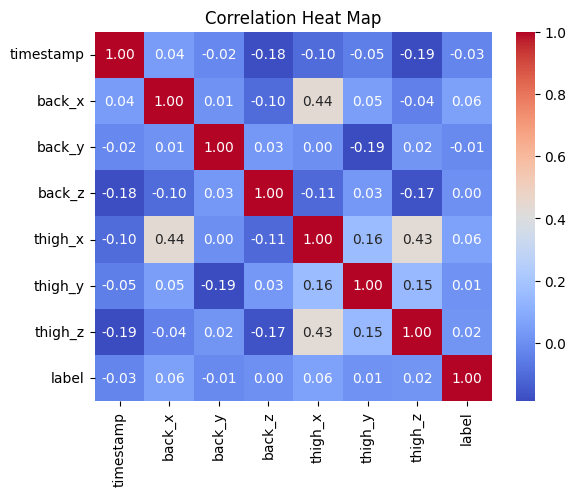

In [10]:
#heat map 
correlation_matrix = final_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heat Map")
plt.show()

In [10]:
#encode the label to use it on the plot 
from sklearn.preprocessing import LabelEncoder
labels = final_df['label']
encoder = LabelEncoder()
encoder.fit(labels) 
labels_encoded = encoder.transform(labels)

In [11]:
labels_encoded

array([5, 5, 5, ..., 2, 2, 2])

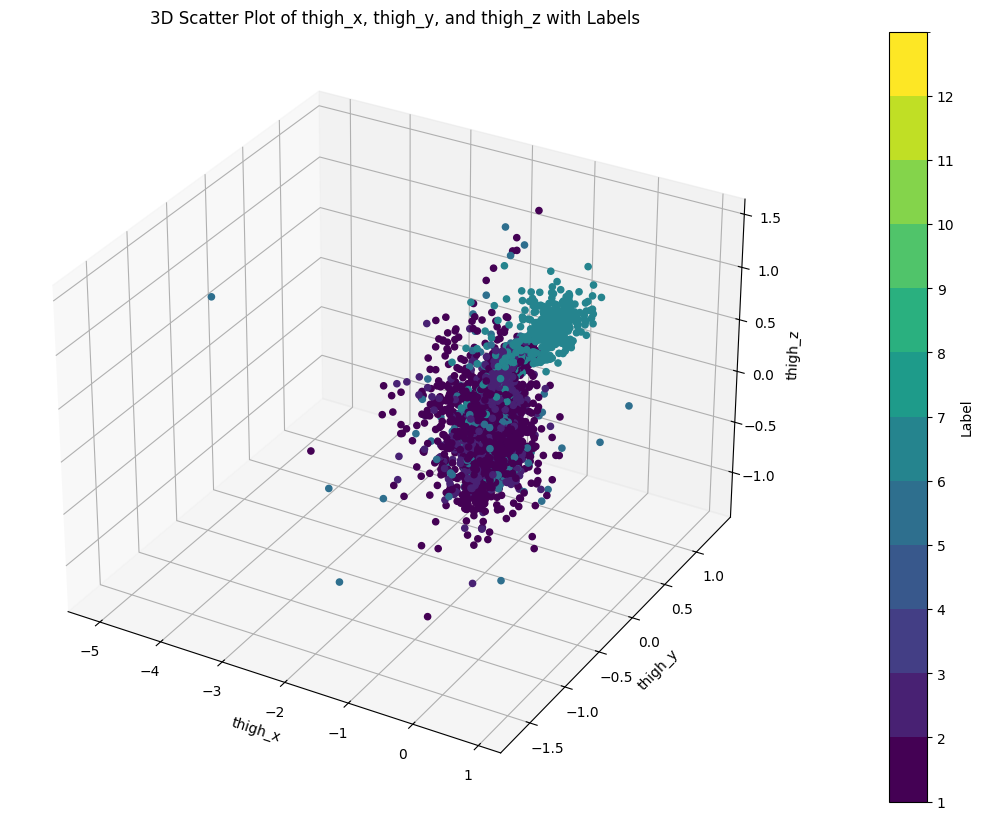

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import BoundaryNorm
x = final_df['thigh_x'][:100000]
y = final_df['thigh_y'][:100000]
z = final_df['thigh_z'][:100000]
labels = labels_encoded[:100000]

# Create a 3D scatter plot with color coding by label
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Set up color normalization to cover all label values
norm = BoundaryNorm(np.arange(1, 14), ncolors=256)

scatter = ax.scatter(x, y, z, c=labels, cmap='viridis', marker='o', alpha=1, norm=norm)

# Add title and labels
ax.set_title('3D Scatter Plot of thigh_x, thigh_y, and thigh_z with Labels')
ax.set_xlabel('thigh_x')
ax.set_ylabel('thigh_y')
ax.set_zlabel('thigh_z')

# Add a color bar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1, ticks=np.arange(1, 13))
cbar.set_label('Label')
cbar.set_ticks(np.arange(1, 13))
cbar.set_ticklabels(np.arange(1, 13))

# Show the plot
plt.show()

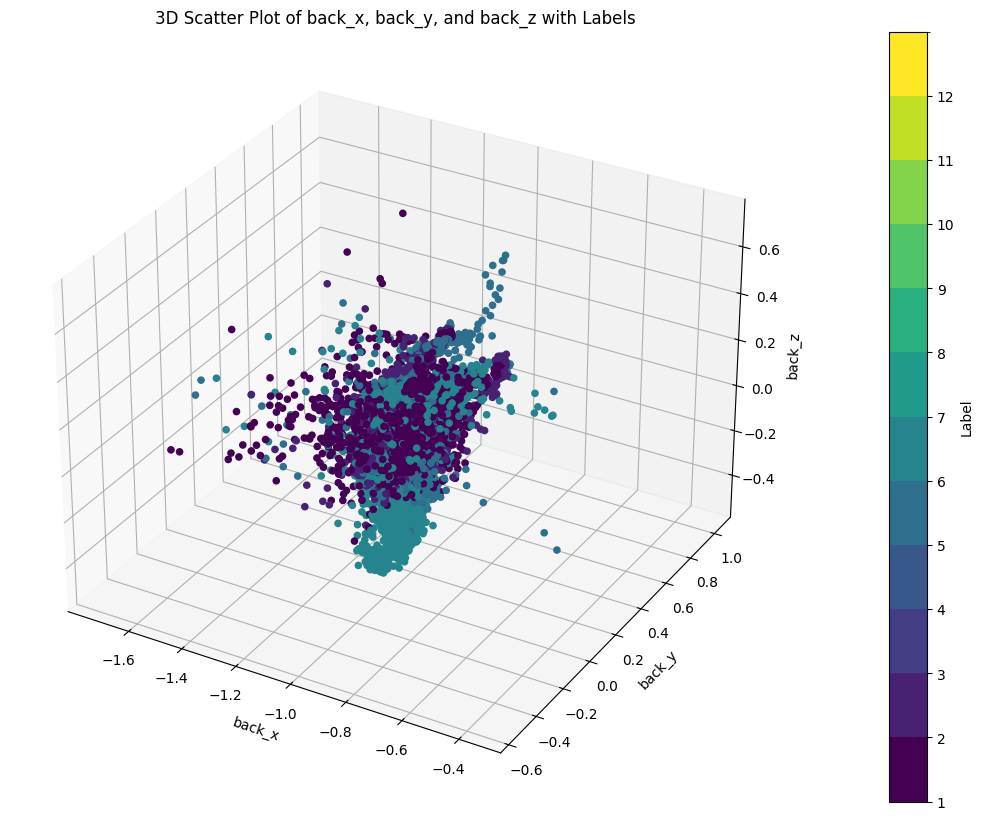

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import BoundaryNorm
x = final_df['back_x'][:100000]
y = final_df['back_y'][:100000]
z = final_df['back_z'][:100000]
labels = labels_encoded[:100000]

# Create a 3D scatter plot with color coding by label
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Set up color normalization to cover all label values
norm = BoundaryNorm(np.arange(1, 14), ncolors=256)

scatter = ax.scatter(x, y, z, c=labels, cmap='viridis', marker='o', alpha=1, norm=norm)

# Add title and labels
ax.set_title('3D Scatter Plot of back_x, back_y, and back_z with Labels')
ax.set_xlabel('back_x')
ax.set_ylabel('back_y')
ax.set_zlabel('back_z')

# Add a color bar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1, ticks=np.arange(1, 13))
cbar.set_label('Label')
cbar.set_ticks(np.arange(1, 13))
cbar.set_ticklabels(np.arange(1, 13))

# Show the plot
plt.show()

We can see that the label 7 is the majority class appearing on the plot the modt

<h3>Split data train and test</h3>

In [17]:
#test and train split
from sklearn.model_selection import train_test_split
features = final_df[["back_x", "back_y", "back_z", "thigh_x", "thigh_y", "thigh_z"]]
label = final_df["label"]

# X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
# Split data into training, validation, and test sets
#0.7 for train ,0.15 test ,0.15 val 
X_train, X_temp, y_train, y_temp = train_test_split(features, label, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print ("X_train =",X_train.shape, " --- y_train = ", y_train.shape )
print ("X_val =",X_val.shape, " --- y_val = ", y_val.shape )
print ("X_test =",X_test.shape, " --- y_test = ", y_test.shape )

X_train = (4522929, 6)  --- y_train =  (4522929,)
X_val = (969199, 6)  --- y_val =  (969199,)
X_test = (969200, 6)  --- y_test =  (969200,)


In [18]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#normalization
scaler_normalization = MinMaxScaler()
scaler_normalization.fit(X_train)
X_train_normalized = scaler_normalization.transform(X_train)
X_test_normalized = scaler_normalization.transform(X_test)

#StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h2>Train knn on the data without date </h2>

<h3>Using sampling on data</h3>

In [16]:
#sample 10 %
sample_df_10=final_df.sample(frac=0.1,random_state=42)

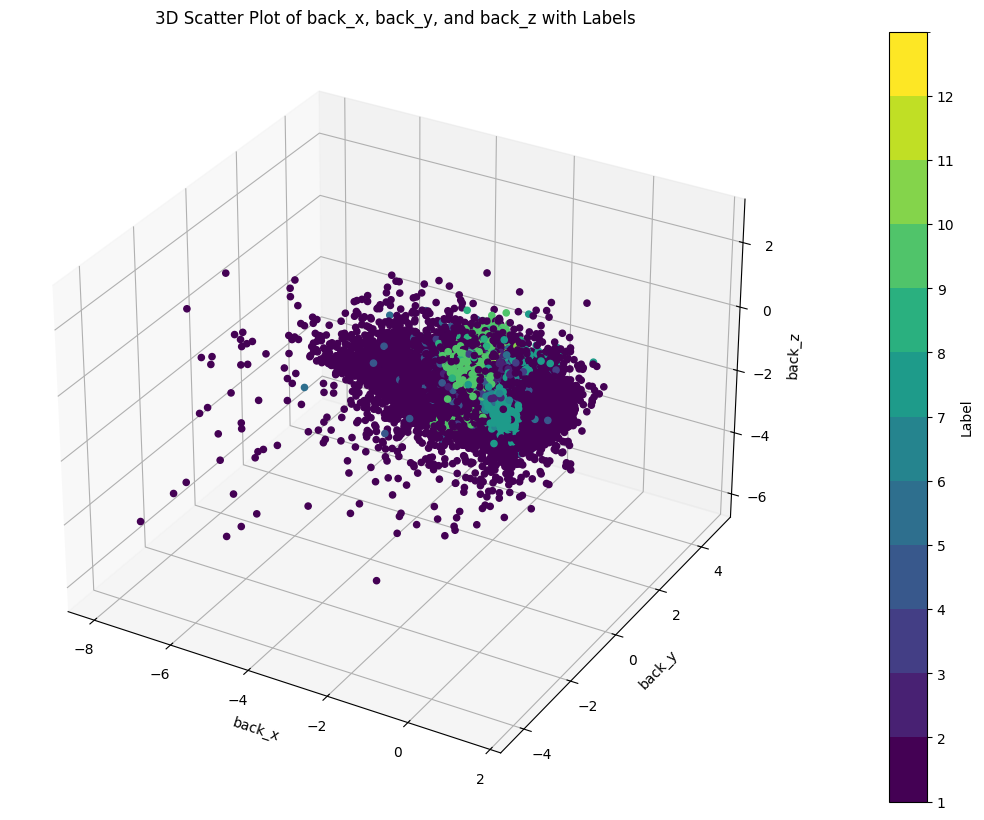

In [18]:
#plot data to see the distribution of the labels over data 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import BoundaryNorm
labels = sample_df_10['label']
labels_encoded = encoder.transform(labels)
x = sample_df_10['back_x']
y = sample_df_10['back_y']
z = sample_df_10['back_z']
labels = labels_encoded

# Create a 3D scatter plot with color coding by label
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Set up color normalization to cover all label values
norm = BoundaryNorm(np.arange(1, 14), ncolors=256)

scatter = ax.scatter(x, y, z, c=labels, cmap='viridis', marker='o', alpha=1, norm=norm)

# Add title and labels
ax.set_title('3D Scatter Plot of back_x, back_y, and back_z with Labels')
ax.set_xlabel('back_x')
ax.set_ylabel('back_y')
ax.set_zlabel('back_z')

# Add a color bar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1, ticks=np.arange(1, 13))
cbar.set_label('Label')
cbar.set_ticks(np.arange(1, 13))
cbar.set_ticklabels(np.arange(1, 13))

# Show the plot
plt.show()

In [19]:
sample_df_10['label'].value_counts()

label
7      290349
1      119564
6       73990
8       43089
13      39474
2       29319
3       25616
4        7649
5        6644
14       5490
130      4162
140       787
Name: count, dtype: int64

In [20]:
#split train test and val 
features_sample = sample_df_10[["back_x", "back_y", "back_z", "thigh_x", "thigh_y", "thigh_z"]]
label_sample = sample_df_10["label"]

#0.7 for train ,0.15 test ,0.15 val 
X_train_sample, X_temp, y_train_sample, y_temp = train_test_split(features_sample, label_sample, test_size=0.3, random_state=42)
X_val_sample, X_test_sample, y_val_sample, y_test_sample = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print ("X_train =",X_train_sample.shape, " --- y_train = ", y_train_sample.shape )
print ("X_val =",X_val_sample.shape, " --- y_val = ", y_val_sample.shape )
print ("X_test =",X_test_sample.shape, " --- y_test = ", y_test_sample.shape )

X_train = (452293, 6)  --- y_train =  (452293,)
X_val = (96920, 6)  --- y_val =  (96920,)
X_test = (96920, 6)  --- y_test =  (96920,)


In [21]:
#using the best knn from the hyperparameter 
knn_sample = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                                metric_params=None, n_jobs=None,n_neighbors= 7, 
                                p=2, weights ='distance')
#5 folds 
cv_scores_sample = cross_val_score(knn_sample, X_train_sample, y_train_sample, cv=5, scoring='accuracy')

print(f"KNN Model Average Accuracy (CV=5): {cv_scores_sample.mean():.4f}")

KNN Model Average Accuracy (CV=5): 0.8853


In [22]:
accuracy_sample_df_10=cv_scores_sample.mean()
accuracy_sample_df_10

0.8852823257817459

In [28]:
knn_sample.fit(X_train_sample, y_train_sample)

KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

In [30]:
#test accuracy 
y_pred_sample_df_10 = knn_sample.predict(X_test_sample)
accuracy_sample_df_10 = accuracy_score(y_test_sample, y_pred_sample_df_10)
precision_sample_df_10 = precision_score(y_test_sample, y_pred_sample_df_10,average='weighted')
recall_sample_df_10 = recall_score(y_test_sample, y_pred_sample_df_10,average='weighted')
f1_sample_df_10 = f1_score(y_test_sample, y_pred_sample_df_10,average='weighted')

print(f"KNN Model Accuracy on under sample Set: {accuracy_sample_df_10:.4f}")
print(f"Precision: {precision_sample_df_10:.4f}")
print(f"Recall: {recall_sample_df_10:.4f}")
print(f"F1-score: {f1_sample_df_10:.4f}")

KNN Model Accuracy on under sample Set: 0.8858
Precision: 0.8755
Recall: 0.8858
F1-score: 0.8775


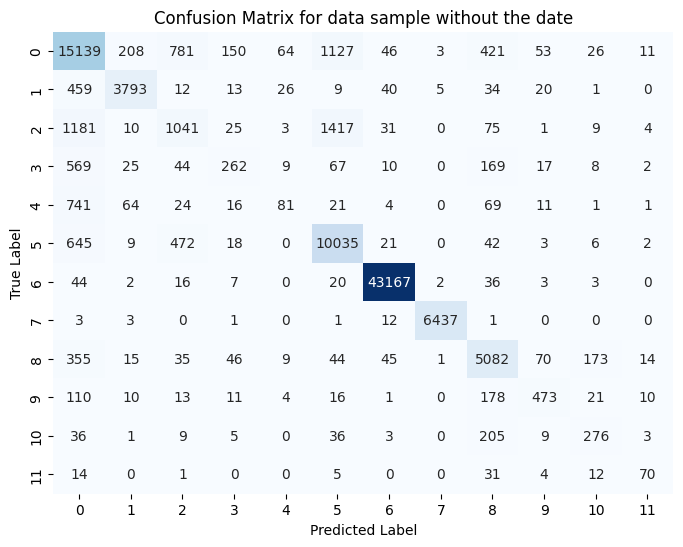

In [32]:
#confusion matrix 
cm_knn = confusion_matrix(y_test_sample, y_pred_sample_df_10)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for data sample without the date')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [34]:
#classification report 
print("Classification report on sample 10% without date :\n",classification_report(y_test_sample, y_pred_sample_df_10))

Classification report on sample 10% without date :
               precision    recall  f1-score   support

           1       0.78      0.84      0.81     18029
           2       0.92      0.86      0.89      4412
           3       0.43      0.27      0.33      3797
           4       0.47      0.22      0.30      1182
           5       0.41      0.08      0.13      1033
           6       0.78      0.89      0.83     11253
           7       1.00      1.00      1.00     43300
           8       1.00      1.00      1.00      6458
          13       0.80      0.86      0.83      5889
          14       0.71      0.56      0.63       847
         130       0.51      0.47      0.49       583
         140       0.60      0.51      0.55       137

    accuracy                           0.89     96920
   macro avg       0.70      0.63      0.65     96920
weighted avg       0.88      0.89      0.88     96920



<b>The Average Class accuracy </b>
- Precision, recall, and the F1 measure work best in
prediction problems with binary target features and place
an emphasis on capturing the performance of a prediction
model on the positive, or most important, level.
- In many cases, however, it does not make sense to
consider one target level as being more important. The
average class accuracy performance measure can be
effective in these cases.

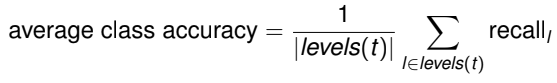

In [124]:
list_of_labels=sample_df_10['label'].unique()
list_of_labels

array([  3,   1,   7,   2,   8,  13,   6, 130,   4,   5,  14, 140])

In [125]:
#Average Class accuracy sample data without date
report = classification_report(y_test_sample, y_pred_sample_df_10,output_dict=True)

# Extract recall values for each class
sum=0
list_of_labels=sample_df_10['label'].unique()
for i in list_of_labels:
    label_str = str(i)
    sum+=report[label_str]['recall']
average_acc_sample_no_date=sum/12
print("average accuracy for sample data:",average_acc_sample_no_date)

average accuracy for sample data: 0.6304037869201983


In [52]:
#save the model 
from joblib import dump 
dump(knn_sample,"knn_sample10_without_date.joblib")

['knn_sample10_without_date.joblib']

<h3>Using under sampling </h3> 

In [87]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the undersampler
undersampler = RandomUnderSampler(random_state=0)

X = final_df.drop('label', axis=1)
y = final_df['label']

# Perform undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

undersampled_data = pd.concat([X_resampled, y_resampled], axis=1)

In [88]:
undersampled_data

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
6146124,2019-01-12 00:10:16.120,-0.589355,-0.000732,-0.251709,-1.026611,-0.218506,-0.091797,1
4726845,2019-01-12 00:48:11.420,-1.322754,-0.628237,0.361099,0.018454,-0.030190,-0.584674,1
3526658,2000-01-01 01:41:59.620,-0.661670,0.282209,-0.149041,-0.025017,-0.071871,-0.903879,1
5308967,2019-01-12 00:28:33.840,-0.383057,0.056885,-0.217773,-0.766602,-0.001709,-0.209961,1
5629943,2019-01-12 00:33:51.040,-0.655762,-0.360596,-0.479736,-2.260498,0.989258,-0.207764,1
...,...,...,...,...,...,...,...,...
5931083,2019-01-12 00:56:03.500,-0.764648,-0.076416,-0.657959,-0.786133,0.012695,-0.859375,140
5931084,2019-01-12 00:56:03.520,-0.705566,-0.064697,-0.652344,-0.721191,0.067871,-0.867676,140
5931085,2019-01-12 00:56:03.540,-0.707520,-0.068115,-0.670166,-0.666260,0.089844,-0.818848,140
5931086,2019-01-12 00:56:03.560,-0.729492,-0.088867,-0.656494,-0.644287,0.112793,-0.751709,140


In [89]:
undersampled_data["label"].value_counts()

label
1      7865
2      7865
3      7865
4      7865
5      7865
6      7865
7      7865
8      7865
13     7865
14     7865
130    7865
140    7865
Name: count, dtype: int64

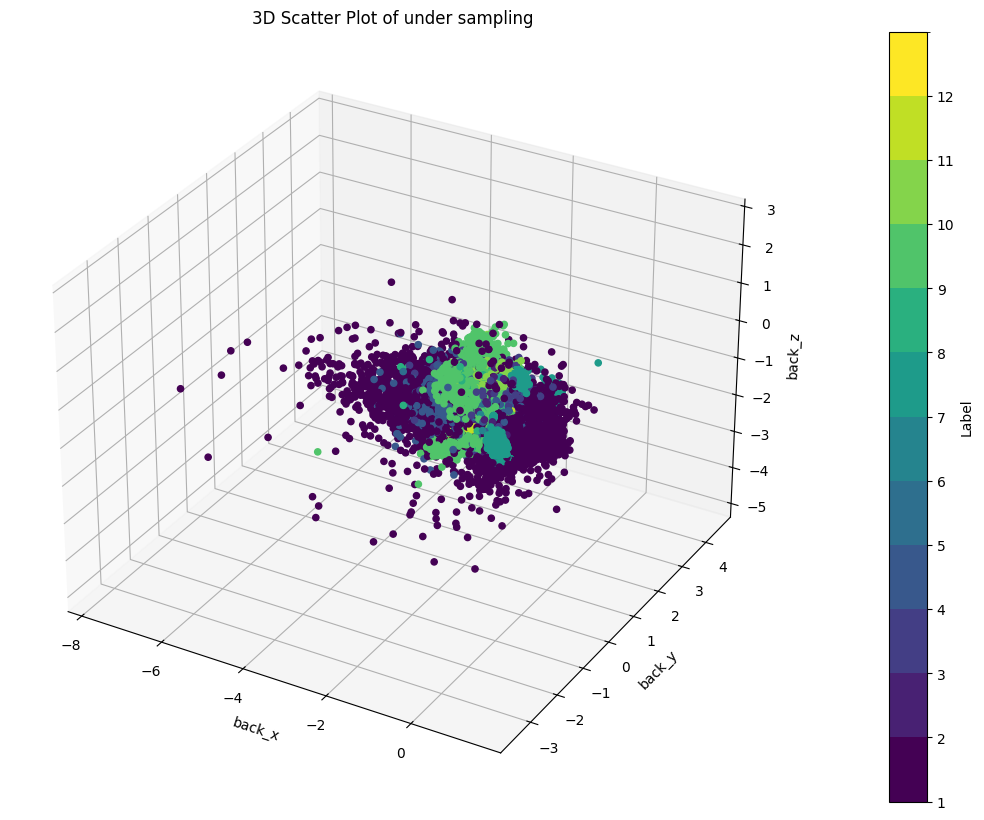

In [39]:
#plot
#plot data to see the distribution of the labels over data 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import BoundaryNorm
labels = undersampled_data['label']
labels_encoded = encoder.transform(labels)
x = undersampled_data['back_x']
y = undersampled_data['back_y']
z = undersampled_data['back_z']
labels = labels_encoded

# Create a 3D scatter plot with color coding by label
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Set up color normalization to cover all label values
norm = BoundaryNorm(np.arange(1, 14), ncolors=256)

scatter = ax.scatter(x, y, z, c=labels, cmap='viridis', marker='o', alpha=1, norm=norm)

# Add title and labels
ax.set_title('3D Scatter Plot of under sampling ')
ax.set_xlabel('back_x')
ax.set_ylabel('back_y')
ax.set_zlabel('back_z')

# Add a color bar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1, ticks=np.arange(1, 13))
cbar.set_label('Label')
cbar.set_ticks(np.arange(1, 13))
cbar.set_ticklabels(np.arange(1, 13))

# Show the plot
plt.show()

In [79]:
features_under_sample = undersampled_data[["back_x", "back_y", "back_z", "thigh_x", "thigh_y", "thigh_z"]]
label__under_sample = undersampled_data["label"]

X_train, X_temp, y_train, y_temp = train_test_split(features_under_sample, label__under_sample, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print ("X_train =",X_train.shape, " --- y_train = ", y_train.shape )
print ("X_val =",X_val.shape, " --- y_val = ", y_val.shape )
print ("X_test =",X_test.shape, " --- y_test = ", y_test.shape )

X_train = (66066, 6)  --- y_train =  (66066,)
X_val = (14157, 6)  --- y_val =  (14157,)
X_test = (14157, 6)  --- y_test =  (14157,)


In [41]:
knn_undersample=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                                metric_params=None, n_jobs=None,n_neighbors= 7, 
                                p=2, weights ='distance')
knn_undersample.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

In [42]:
y_pred_undersample = knn_undersample.predict(X_test)
accuracy_undersample = accuracy_score(y_test, y_pred_undersample)
precision_undersample = precision_score(y_test, y_pred_undersample,average='weighted')
recall_undersample = recall_score(y_test, y_pred_undersample,average='weighted')
f1_undersample = f1_score(y_test, y_pred_undersample,average='weighted')

print(f"KNN Model Accuracy on under sample Set: {accuracy_undersample:.4f}")
print(f"Precision: {precision_undersample:.4f}")
print(f"Recall: {recall_undersample:.4f}")
print(f"F1-score: {f1_undersample:.4f}")

KNN Model Accuracy on under sample Set: 0.7172
Precision: 0.7131
Recall: 0.7172
F1-score: 0.7130


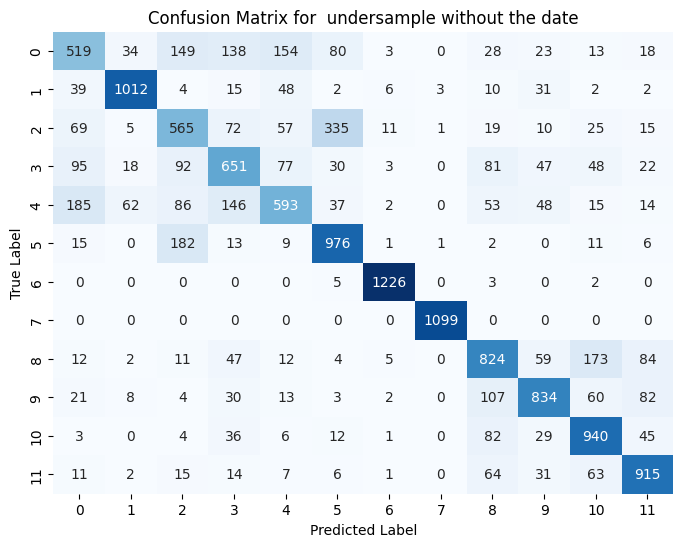

In [45]:
#confusion matrix 
cm_knn = confusion_matrix(y_test, y_pred_undersample)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for  undersample without the date')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [44]:
#classification report 
print("Classification report on under sample dataset without date :\n",classification_report(y_test, y_pred_undersample))

Classification report on under sample dataset without date :
               precision    recall  f1-score   support

           1       0.54      0.45      0.49      1159
           2       0.89      0.86      0.87      1174
           3       0.51      0.48      0.49      1184
           4       0.56      0.56      0.56      1164
           5       0.61      0.48      0.53      1241
           6       0.66      0.80      0.72      1216
           7       0.97      0.99      0.98      1236
           8       1.00      1.00      1.00      1099
          13       0.65      0.67      0.66      1233
          14       0.75      0.72      0.73      1164
         130       0.70      0.81      0.75      1158
         140       0.76      0.81      0.78      1129

    accuracy                           0.72     14157
   macro avg       0.71      0.72      0.71     14157
weighted avg       0.71      0.72      0.71     14157



In [126]:
list_of_labels=undersampled_data['label'].unique()
list_of_labels

array([  1,   2,   3,   4,   5,   6,   7,   8,  13,  14, 130, 140])

In [129]:
#Average Class accuracy sample data without date
report = classification_report(y_test, y_pred_undersample,output_dict=True)
sum=0
list_of_labels=undersampled_data['label'].unique()
for i in list_of_labels:
    label_str = str(i)
    sum+=report[label_str]['recall']
average_acc_undersampled_no_date=sum/12
print("average accuracy for undersampled:",average_acc_undersampled_no_date)

average accuracy for undersampled: 0.7188037872319502


In [53]:
#save the model  
from joblib import dump 
dump(knn_undersample,"knn_undersample_without_date.joblib")

['knn_undersample_without_date.joblib']

<h3>On full data without date </h3>

In [85]:
#test and train split
from sklearn.model_selection import train_test_split
features = final_df[["back_x", "back_y", "back_z", "thigh_x", "thigh_y", "thigh_z"]]
label = final_df["label"]

#0.7 for train ,0.15 test ,0.15 val 
X_train_full_data, X_temp, y_train_full_data, y_temp = train_test_split(features, label, test_size=0.3, random_state=42)
X_val_full_data, X_test_full_data, y_val_full_data, y_test_full_data = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print ("X_train =",X_train_full_data.shape, " --- y_train = ", y_train.shape )
print ("X_val =",X_val_full_data.shape, " --- y_val = ", y_val_full_data.shape )
print ("X_test =",X_test_full_data.shape, " --- y_test = ", y_test_full_data.shape )

X_train = (4522929, 6)  --- y_train =  (66066,)
X_val = (969199, 6)  --- y_val =  (969199,)
X_test = (969200, 6)  --- y_test =  (969200,)


In [47]:
final_df["label"].value_counts()

label
7      2902703
1      1197155
6       743480
8       428898
13      393963
2       291356
3       254839
4        76217
5        67253
14       55814
130      41785
140       7865
Name: count, dtype: int64

In [50]:
knn_full_data=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                                metric_params=None, n_jobs=None,n_neighbors= 7, 
                                p=2, weights ='distance')
knn_full_data.fit(X_train_full_data, y_train_full_data)

KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

In [51]:
y_pred_full_data = knn_full_data.predict(X_test_full_data)
accuracy_full_data = accuracy_score(y_test_full_data, y_pred_full_data)
precision_full_data = precision_score(y_test_full_data, y_pred_full_data,average='weighted')
recall_full_data = recall_score(y_test_full_data, y_pred_full_data,average='weighted')
f1_full_data = f1_score(y_test_full_data, y_pred_full_data,average='weighted')

print(f"KNN Model Accuracy on full dataset: {accuracy_full_data:.4f}")
print(f"Precision: {precision_full_data:.4f}")
print(f"Recall: {recall_full_data:.4f}")
print(f"F1-score: {f1_full_data:.4f}")

KNN Model Accuracy on full dataset: 0.8986
Precision: 0.8911
Recall: 0.8986
F1-score: 0.8929


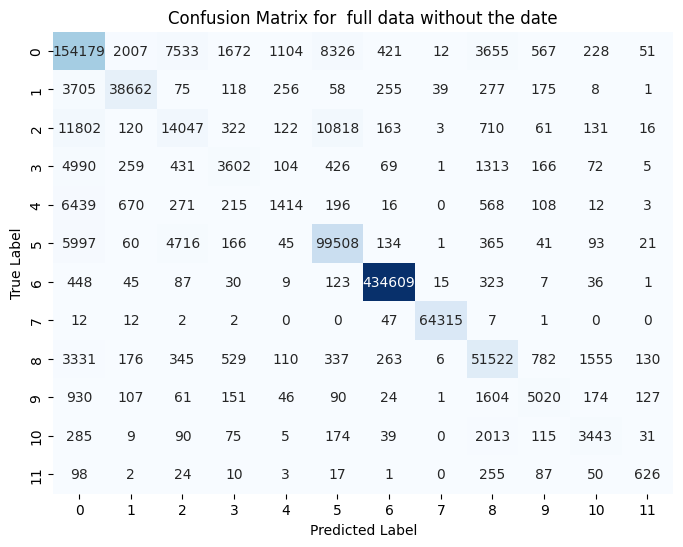

In [54]:
#confusion matrix 
cm_knn = confusion_matrix(y_test_full_data, y_pred_full_data)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for  full data without the date')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [56]:
#classification report 
print("Classification report on full dataset without date :\n",classification_report(y_test_full_data, y_pred_full_data))

Classification report on full dataset without date :
               precision    recall  f1-score   support

           1       0.80      0.86      0.83    179755
           2       0.92      0.89      0.90     43629
           3       0.51      0.37      0.43     38315
           4       0.52      0.31      0.39     11438
           5       0.44      0.14      0.22      9912
           6       0.83      0.90      0.86    111147
           7       1.00      1.00      1.00    435733
           8       1.00      1.00      1.00     64398
          13       0.82      0.87      0.85     59086
          14       0.70      0.60      0.65      8335
         130       0.59      0.55      0.57      6279
         140       0.62      0.53      0.57      1173

    accuracy                           0.90    969200
   macro avg       0.73      0.67      0.69    969200
weighted avg       0.89      0.90      0.89    969200



compared to the one of undersampling,The full dataset knn model resulted in better accuracy but when coming to the classification report, we can cearly see some target levels that are captured by the model with high values ,while others where captured with very low values 

In [130]:
report = classification_report(y_test_full_data, y_pred_full_data,output_dict=True)
sum=0
list_of_labels=undersampled_data['label'].unique()
for i in list_of_labels:
    label_str = str(i)
    sum+=report[label_str]['recall']
average_acc_fulldata_no_date=sum/12
print("average accuracy for undersampled:",average_acc_fulldata_no_date)

average accuracy for undersampled: 0.6679789793923084


In [57]:
#save model
from joblib import dump 
dump(knn_full_data,"knn_full_data_without_date.joblib")

['knn_full_data_without_date.joblib']

In [97]:
#see if the model can generalize with train 20% and 80% test 
#test and train split
from sklearn.model_selection import train_test_split
features = final_df[["back_x", "back_y", "back_z", "thigh_x", "thigh_y", "thigh_z"]]
label = final_df["label"]

#0.2 for train ,0.8 test 
X_train_generalize, X_test_generalize, y_train_generalize, y_test_generalize = train_test_split(features, label, test_size=0.8, random_state=42)
print ("X_train =",X_train_generalize.shape, " --- y_train = ", y_train_generalize.shape )
print ("X_test =",X_test_generalize.shape, " --- y_test = ", y_test_generalize.shape )

X_train = (1292265, 6)  --- y_train =  (1292265,)
X_test = (5169063, 6)  --- y_test =  (5169063,)


In [99]:
knn_generalize=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                                metric_params=None, n_jobs=None,n_neighbors= 7, 
                                p=2, weights ='distance')
knn_generalize.fit(X_train_generalize, y_train_generalize)
y_pred_generalize = knn_generalize.predict(X_test_generalize)
accuracy_generalize = accuracy_score(y_test_generalize, y_pred_generalize)
precision_generalize = precision_score(y_test_generalize, y_pred_generalize,average='weighted')
recall_generalize = recall_score(y_test_generalize, y_pred_generalize,average='weighted')
f1_generalize = f1_score(y_test_generalize, y_pred_generalize,average='weighted')

print(f"KNN Model Accuracy on full dataset: {accuracy_generalize:.4f}")
print(f"Precision: {precision_generalize:.4f}")
print(f"Recall: {recall_generalize:.4f}")
print(f"F1-score: {f1_generalize:.4f}")

<h2>Using timestamp</h2>

In [61]:
#date aggregation 
# Extract year, month, day, hour, minute, second, and millisecond into separate columns
final_df['year'] = final_df['timestamp'].dt.year
final_df['month'] = final_df['timestamp'].dt.month
final_df['day'] = final_df['timestamp'].dt.day
final_df['hour'] = final_df['timestamp'].dt.hour
final_df['minute'] = final_df['timestamp'].dt.minute
final_df['second'] = final_df['timestamp'].dt.second
final_df['millisecond'] = final_df['timestamp'].dt.microsecond // 1000

final_df.drop(columns=['timestamp'], inplace=True)

final_df.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,year,month,day,hour,minute,second,millisecond
0,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6,2019,1,12,0,0,0,0
1,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6,2019,1,12,0,0,0,10
2,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6,2019,1,12,0,0,0,20
3,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6,2019,1,12,0,0,0,30
4,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6,2019,1,12,0,0,0,40


<h3>Using full dataset</h3>

In [62]:
#test and train split
from sklearn.model_selection import train_test_split
features = final_df[["back_x", "back_y", "back_z", "thigh_x", "thigh_y", "thigh_z","year","month","day","hour","minute","second","millisecond"]]
label = final_df["label"]


#0.7 for train ,0.15 test ,0.15 val 
X_train_full_data_with_date, X_temp, y_train_full_data_with_date, y_temp = train_test_split(features, label, test_size=0.3, random_state=42)
X_val_full_data_with_date, X_test_full_data_with_date, y_val_full_data_with_date, y_test_full_data_with_date = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print ("X_train =",X_train_full_data_with_date.shape, " --- y_train = ", y_train_full_data_with_date.shape )
print ("X_val =",X_val_full_data_with_date.shape, " --- y_val = ", y_val_full_data_with_date.shape )
print ("X_test =",X_test_full_data_with_date.shape, " --- y_test = ", y_test_full_data_with_date.shape )

X_train = (4522929, 13)  --- y_train =  (4522929,)
X_val = (969199, 13)  --- y_val =  (969199,)
X_test = (969200, 13)  --- y_test =  (969200,)


In [63]:
knn_full_data_with_date=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                                metric_params=None, n_jobs=None,n_neighbors= 7, 
                                p=2, weights ='distance')
knn_full_data_with_date.fit(X_train_full_data_with_date, y_train_full_data_with_date)

KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

In [64]:
y_pred_full_data_with_date = knn_full_data_with_date.predict(X_test_full_data_with_date)
accuracy_full_data_with_date = accuracy_score(y_test_full_data_with_date, y_pred_full_data_with_date)
precision_full_data_with_date = precision_score(y_test_full_data_with_date, y_pred_full_data_with_date,average='weighted')
recall_full_data_with_date = recall_score(y_test_full_data_with_date, y_pred_full_data_with_date,average='weighted')
f1_full_data_with_date = f1_score(y_test_full_data_with_date, y_pred_full_data_with_date,average='weighted')

print(f"KNN Model Accuracy on full dataset with date : {accuracy_full_data_with_date:.4f}")
print(f"Precision: {precision_full_data_with_date:.4f}")
print(f"Recall: {recall_full_data_with_date:.4f}")
print(f"F1-score: {f1_full_data_with_date:.4f}")

KNN Model Accuracy on full dataset with date : 0.7142
Precision: 0.6964
Recall: 0.7142
F1-score: 0.6885


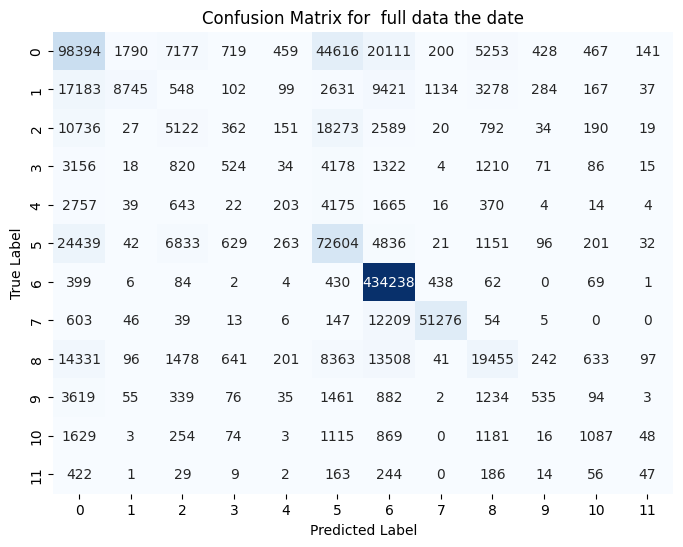

In [81]:
#confusion matrix 
cm_knn = confusion_matrix(y_test_full_data_with_date, y_pred_full_data_with_date)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for  full data the date')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [80]:
#classification report 
print("Classification report on full dataset  with date :\n",classification_report(y_test_full_data_with_date, y_pred_full_data_with_date))

Classification report on full dataset  with date :
               precision    recall  f1-score   support

           1       0.55      0.55      0.55    179755
           2       0.80      0.20      0.32     43629
           3       0.22      0.13      0.17     38315
           4       0.17      0.05      0.07     11438
           5       0.14      0.02      0.04      9912
           6       0.46      0.65      0.54    111147
           7       0.87      1.00      0.93    435733
           8       0.96      0.80      0.87     64398
          13       0.57      0.33      0.42     59086
          14       0.31      0.06      0.11      8335
         130       0.35      0.17      0.23      6279
         140       0.11      0.04      0.06      1173

    accuracy                           0.71    969200
   macro avg       0.46      0.33      0.36    969200
weighted avg       0.70      0.71      0.69    969200



In [131]:
report = classification_report(y_test_full_data_with_date, y_pred_full_data_with_date,output_dict=True)
sum=0
list_of_labels=undersampled_data['label'].unique()
for i in list_of_labels:
    label_str = str(i)
    sum+=report[label_str]['recall']
average_acc_full_data_with_date=sum/12
print("average accuracy for undersampled:",average_acc_full_data_with_date)

average accuracy for undersampled: 0.33337167010618546


In [69]:
#save the model 
from joblib import dump 
dump(knn_full_data_with_date,"knn_full_data_with_date.joblib")

['knn_full_data_with_date.joblib']

<h3>Sampling with date </h3>

In [87]:
#sample 10 %
sample_df_10_with_date=final_df.sample(frac=0.1,random_state=42)

In [88]:
#split train test and val 
features_sample = sample_df_10_with_date[["back_x", "back_y", "back_z", "thigh_x", "thigh_y", "thigh_z","year","month","day","hour","minute","second","millisecond"]]
label_sample = sample_df_10_with_date["label"]

#0.7 for train ,0.15 test ,0.15 val 
X_train_sample_with_date, X_temp, y_train_sample_with_date, y_temp = train_test_split(features_sample, label_sample, test_size=0.3, random_state=42)
X_val_sample_with_date, X_test_sample_with_date, y_val_sample_with_date, y_test_sample_with_date = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print ("X_train =",X_train_sample_with_date.shape, " --- y_train = ", y_train_sample_with_date.shape )
print ("X_val =",X_val_sample_with_date.shape, " --- y_val = ", y_val_sample_with_date.shape )
print ("X_test =",X_test_sample_with_date.shape, " --- y_test = ", y_test_sample_with_date.shape )

X_train = (452293, 13)  --- y_train =  (452293,)
X_val = (96920, 13)  --- y_val =  (96920,)
X_test = (96920, 13)  --- y_test =  (96920,)


In [89]:
knn_sample_with_date=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                                metric_params=None, n_jobs=None,n_neighbors= 7, 
                                p=2, weights ='distance')
knn_sample_with_date.fit(X_train_sample_with_date, y_train_sample_with_date)
y_pred_sample_with_date = knn_sample_with_date.predict(X_test_sample_with_date)
accuracy_sample_with_date = accuracy_score(y_test_sample_with_date, y_pred_sample_with_date)
precision_sample_with_date = precision_score(y_test_sample_with_date, y_pred_sample_with_date,average='weighted')
recall_sample_with_date = recall_score(y_test_sample_with_date, y_pred_sample_with_date,average='weighted')
f1_sample_with_date = f1_score(y_test_sample_with_date, y_pred_sample_with_date,average='weighted')

print(f"KNN Model Accuracy on full dataset with date : {accuracy_sample_with_date:.4f}")
print(f"Precision: {precision_sample_with_date:.4f}")
print(f"Recall: {recall_sample_with_date:.4f}")
print(f"F1-score: {f1_sample_with_date:.4f}")

KNN Model Accuracy on full dataset with date : 0.5586
Precision: 0.5092
Recall: 0.5586
F1-score: 0.5035


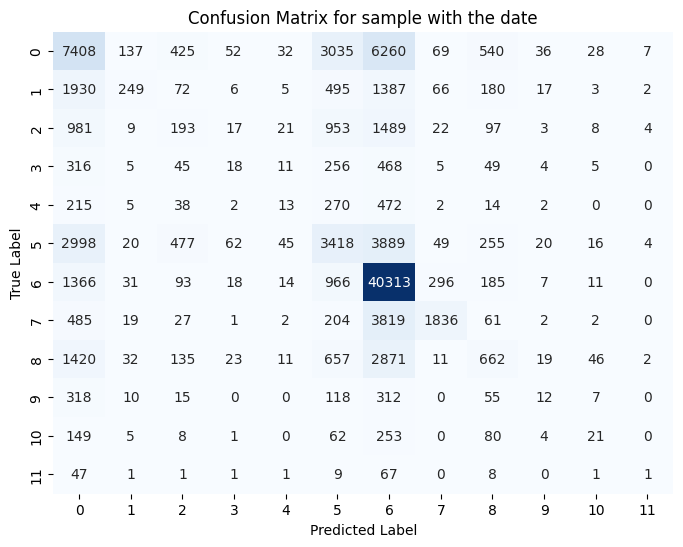

In [91]:
#confusion matrix 
cm_knn = confusion_matrix(y_test_sample_with_date, y_pred_sample_with_date)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for sample with the date')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [92]:
#classification report 
print("Classification report on sample with date :\n",classification_report(y_test_sample_with_date, y_pred_sample_with_date))

Classification report on sample with date :
               precision    recall  f1-score   support

           1       0.42      0.41      0.42     18029
           2       0.48      0.06      0.10      4412
           3       0.13      0.05      0.07      3797
           4       0.09      0.02      0.03      1182
           5       0.08      0.01      0.02      1033
           6       0.33      0.30      0.32     11253
           7       0.65      0.93      0.77     43300
           8       0.78      0.28      0.42      6458
          13       0.30      0.11      0.16      5889
          14       0.10      0.01      0.02       847
         130       0.14      0.04      0.06       583
         140       0.05      0.01      0.01       137

    accuracy                           0.56     96920
   macro avg       0.30      0.19      0.20     96920
weighted avg       0.51      0.56      0.50     96920



In [133]:
report = classification_report(y_test_sample_with_date, y_pred_sample_with_date,output_dict=True)
sum=0
list_of_labels=undersampled_data['label'].unique()
for i in list_of_labels:
    label_str = str(i)
    sum+=report[label_str]['recall']
average_acc_sample_with_date=sum/12
print("average accuracy for sample:",average_acc_sample_with_date)

average accuracy for sample: 0.1862441413565893


In [90]:
#save the model 
from joblib import dump 
dump(knn_sample_with_date,"knn_sample_with_date.joblib")

['knn_sample_with_date.joblib']

<h3>Under sampling with date </h3>

In [70]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the undersampler
undersampler = RandomUnderSampler(random_state=0)

X = final_df.drop('label', axis=1)
y = final_df['label']

# Perform undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

undersampled_data_with_date = pd.concat([X_resampled, y_resampled], axis=1)

In [71]:
undersampled_data_with_date

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,year,month,day,hour,minute,second,millisecond,label
6146124,-0.589355,-0.000732,-0.251709,-1.026611,-0.218506,-0.091797,2019,1,12,0,10,16,120,1
4726845,-1.322754,-0.628237,0.361099,0.018454,-0.030190,-0.584674,2019,1,12,0,48,11,420,1
3526658,-0.661670,0.282209,-0.149041,-0.025017,-0.071871,-0.903879,2000,1,1,1,41,59,620,1
5308967,-0.383057,0.056885,-0.217773,-0.766602,-0.001709,-0.209961,2019,1,12,0,28,33,840,1
5629943,-0.655762,-0.360596,-0.479736,-2.260498,0.989258,-0.207764,2019,1,12,0,33,51,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5931083,-0.764648,-0.076416,-0.657959,-0.786133,0.012695,-0.859375,2019,1,12,0,56,3,500,140
5931084,-0.705566,-0.064697,-0.652344,-0.721191,0.067871,-0.867676,2019,1,12,0,56,3,520,140
5931085,-0.707520,-0.068115,-0.670166,-0.666260,0.089844,-0.818848,2019,1,12,0,56,3,540,140
5931086,-0.729492,-0.088867,-0.656494,-0.644287,0.112793,-0.751709,2019,1,12,0,56,3,560,140


In [76]:
#test and train split
from sklearn.model_selection import train_test_split
features = undersampled_data_with_date[["back_x", "back_y", "back_z", "thigh_x", "thigh_y", "thigh_z","year","month","day","hour","minute","second","millisecond"]]
label = undersampled_data_with_date["label"]


#0.7 for train ,0.15 test ,0.15 val 
X_train, X_temp, y_train, y_temp = train_test_split(features, label__under_sample, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print ("X_train =",X_train.shape, " --- y_train = ", y_train.shape )
print ("X_val =",X_val.shape, " --- y_val = ", y_val.shape )
print ("X_test =",X_test.shape, " --- y_test = ", y_test.shape )

X_train = (66066, 13)  --- y_train =  (66066,)
X_val = (14157, 13)  --- y_val =  (14157,)
X_test = (14157, 13)  --- y_test =  (14157,)


In [77]:
knn_undersample_with_date=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                                metric_params=None, n_jobs=None,n_neighbors= 7, 
                                p=2, weights ='distance')
knn_undersample_with_date.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

In [78]:
y_pred_undersample_with_date = knn_undersample_with_date.predict(X_test)
accuracy_undersample_with_date = accuracy_score(y_test, y_pred_undersample_with_date)
precision_undersample_with_date = precision_score(y_test, y_pred_undersample_with_date,average='weighted')
recall_undersample_with_date = recall_score(y_test, y_pred_undersample_with_date,average='weighted')
f1_undersample_with_date = f1_score(y_test, y_pred_undersample_with_date,average='weighted')

print(f"KNN Model Accuracy on under sample Set: {accuracy_undersample_with_date:.4f}")
print(f"Precision: {precision_undersample_with_date:.4f}")
print(f"Recall: {recall_undersample_with_date:.4f}")
print(f"F1-score: {f1_undersample_with_date:.4f}")

KNN Model Accuracy on under sample Set: 0.2480
Precision: 0.2310
Recall: 0.2480
F1-score: 0.2300


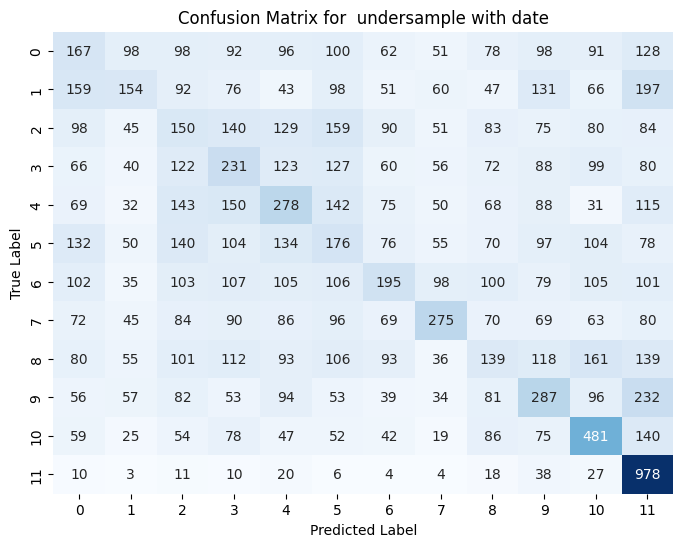

In [79]:
#confusion matrix 
cm_knn = confusion_matrix(y_test, y_pred_undersample_with_date)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for  undersample with date')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [82]:
#classification report 
print("Classification report on undersample dataset  with date :\n",classification_report(y_test, y_pred_undersample_with_date))

Classification report on undersample dataset  with date :
               precision    recall  f1-score   support

           1       0.16      0.14      0.15      1159
           2       0.24      0.13      0.17      1174
           3       0.13      0.13      0.13      1184
           4       0.19      0.20      0.19      1164
           5       0.22      0.22      0.22      1241
           6       0.14      0.14      0.14      1216
           7       0.23      0.16      0.19      1236
           8       0.35      0.25      0.29      1099
          13       0.15      0.11      0.13      1233
          14       0.23      0.25      0.24      1164
         130       0.34      0.42      0.38      1158
         140       0.42      0.87      0.56      1129

    accuracy                           0.25     14157
   macro avg       0.23      0.25      0.23     14157
weighted avg       0.23      0.25      0.23     14157



In [134]:
report = classification_report(y_test, y_pred_undersample_with_date,output_dict=True)
sum=0
list_of_labels=undersampled_data['label'].unique()
for i in list_of_labels:
    label_str = str(i)
    sum+=report[label_str]['recall']
average_acc_undersample_with_date=sum/12
print("average accuracy for undersampled:",average_acc_undersample_with_date)

average accuracy for undersampled: 0.2515061333011057


In [84]:
#save the model 
from joblib import dump 
dump(knn_undersample_with_date,"knn_undersample_with_date.joblib")

['knn_undersample_with_date.joblib']

<h3>Knn with scaled data </h3>

In [19]:
knn_normalized=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                                metric_params=None, n_jobs=None,n_neighbors= 7, 
                                p=2, weights ='distance')
knn_normalized.fit(X_train_scaled, y_train)  
y_pred = knn_normalized.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy on Test Set with scaled data: {accuracy:.4f}")

KNN Model Accuracy on Test Set with normalized data: 0.8986


<h2>Evaluation and results analysis</h2>

General discussion : 
<b>The models condidates </b></br>
    <table border="1">
        <thead>
            <tr>
                <th>Model Configuration</th>
                <th>Accuracy</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>Knn on full data </td>
                <td>0.8986</td>
            </tr>
            <tr>
                <td>Knn on sample data</td>
                <td>0.8858</td>
            </tr>
            <tr>
                <td>knn on undersample</td>
                <td>0.7172</td>
            </tr>
            <tr>
                <td>Knn with timestamp</td>
                <td>0.7142</td>
            </tr>
            <tr>
                <td>Knn with sample timestamp</td>
                <td>0.5586 </td>
            </tr>
            <tr>
                <td>Knn with Undersample with time stamp/td>
                <td>0.248 </td>
            </tr>
        </tbody>
    </table>

First insights on the accuracy give missleading results befire looking into the classifcation reports and the ROC 

<h3>ROC</h3>

In [70]:
class_labels = [1,2, 3, 4, 5, 6, 7, 8,13,14, 130, 140]

In [86]:
#model total data without date
from sklearn.pipeline import Pipeline
import joblib

# Load the saved pipeline model
knn_full_data_without_date = joblib.load('saved_models/knn_full_data_without_date.joblib')
y_pred_full_data=knn_full_data_without_date.predict(X_test_full_data)

In [81]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train_full_data)
y_onehot_test = label_binarizer.transform(y_test_full_data)
y_onehot_test.shape  # (n_samples, n_classes)
y_pred_classes_bin=label_binarizer.transform(y_pred_full_data)

In [82]:
classes = np.flatnonzero(label_binarizer.classes_ == class_labels)
classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

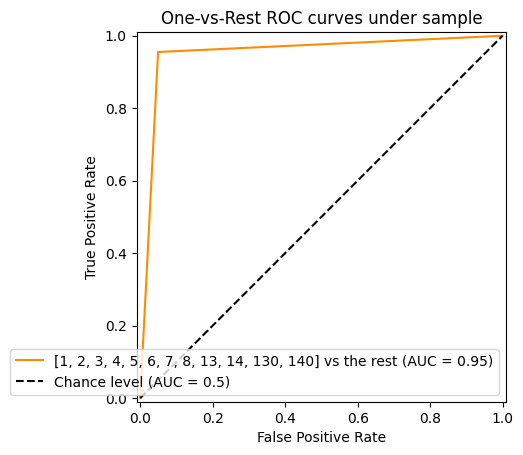

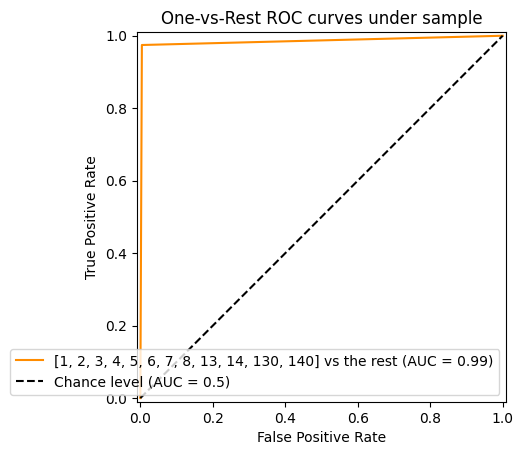

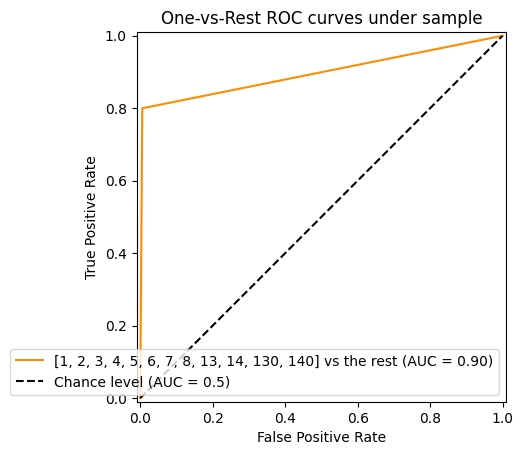

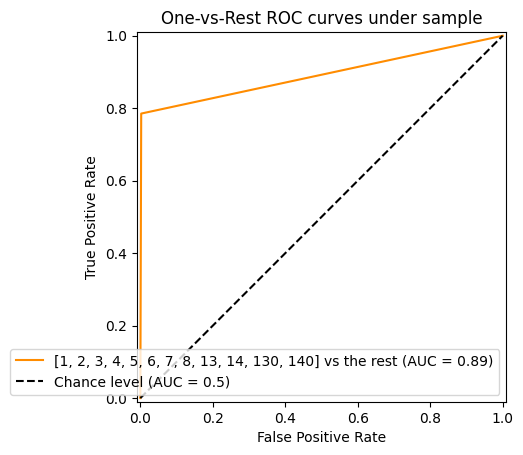

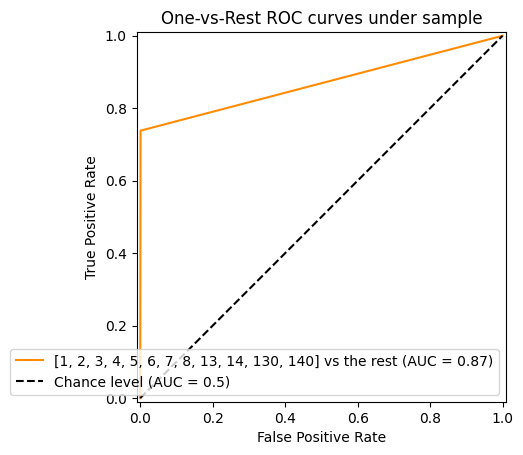

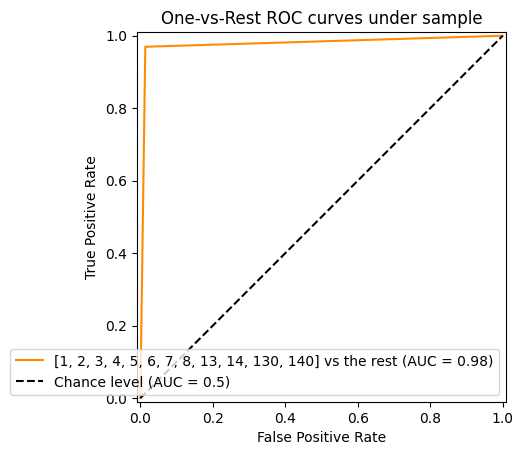

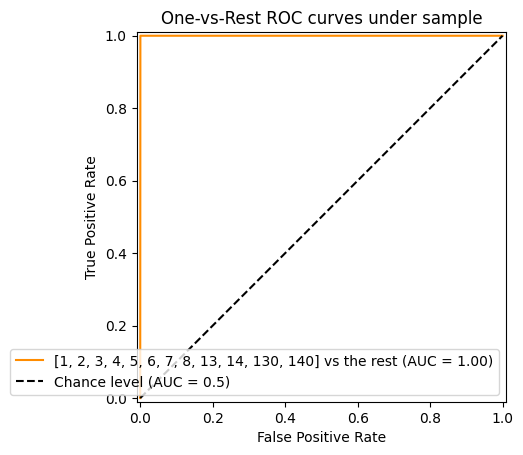

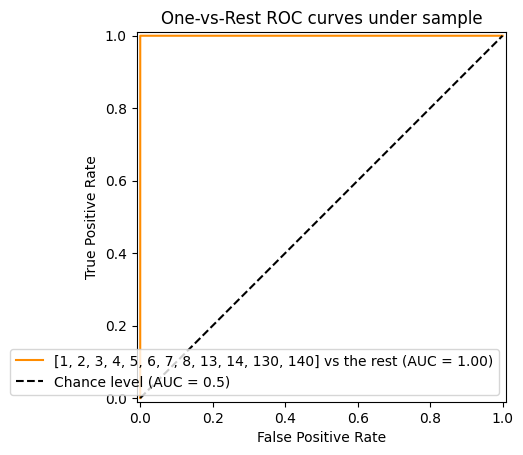

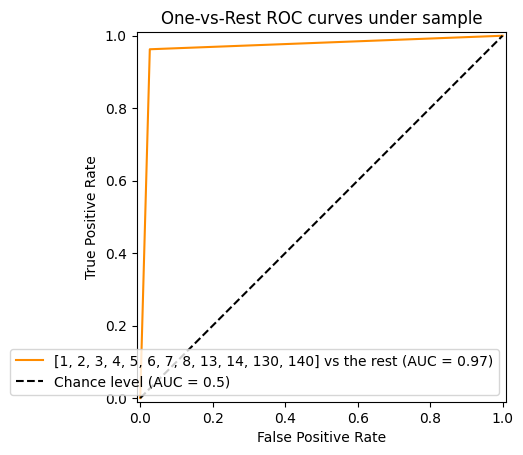

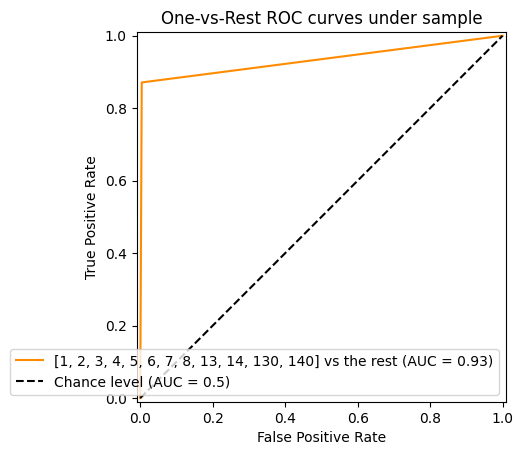

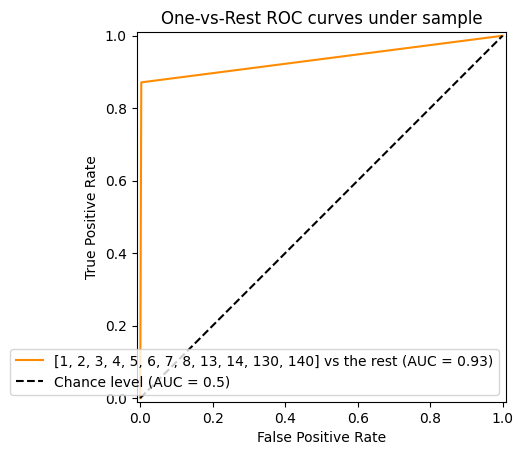

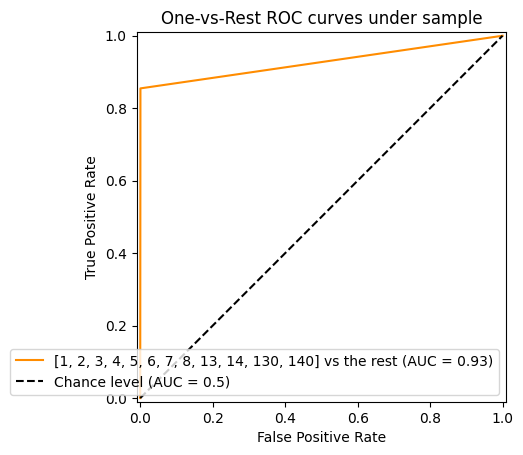

In [83]:
#ROC ON FULL DATA 
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay
for class_id in classes:  
    display = RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred_classes_bin[:, class_id],
        name=f"{class_labels} vs the rest",
        color="darkorange",
        plot_chance_level=True,
    )
    _ = display.ax_.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title="One-vs-Rest ROC curves full  data ",
    )

In [90]:
#ROC under sample 
knn_undersample_without_date = joblib.load('saved_models/knn_undersample_without_date.joblib')
y_pred=knn_undersample_without_date.predict(X_test)

In [91]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)
y_pred_classes_bin=label_binarizer.transform(y_pred)

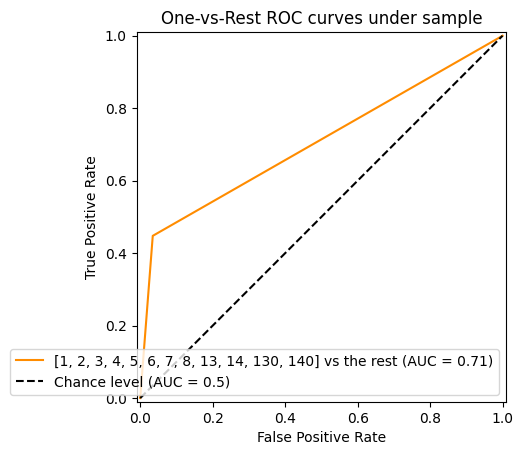

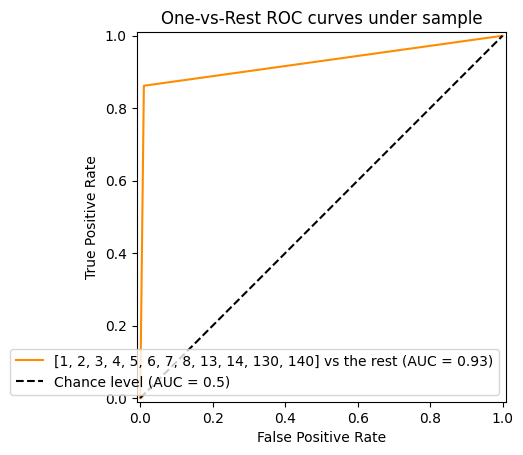

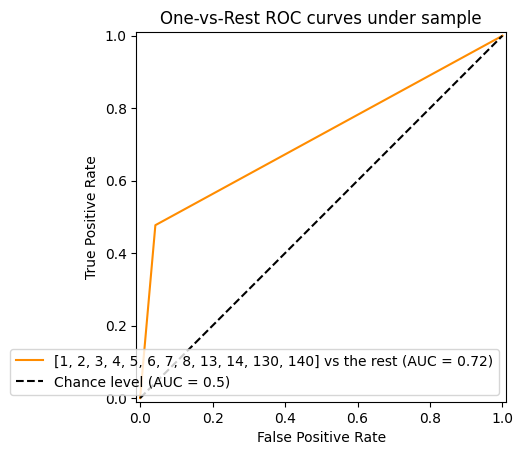

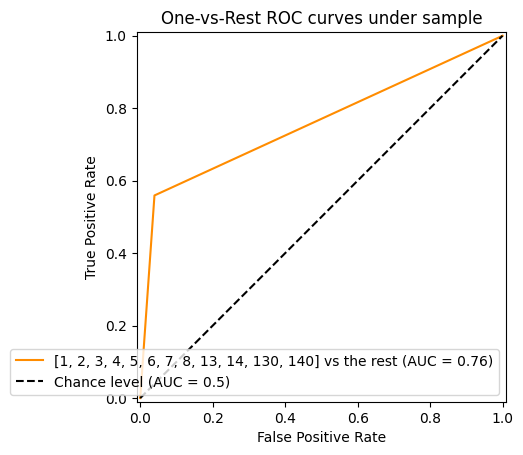

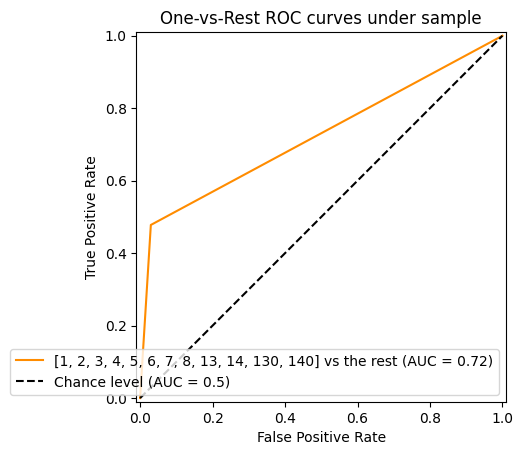

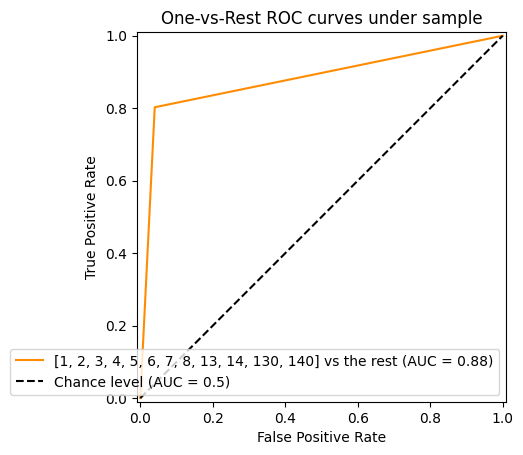

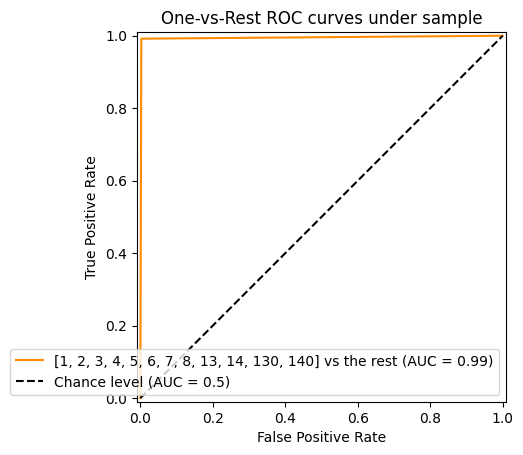

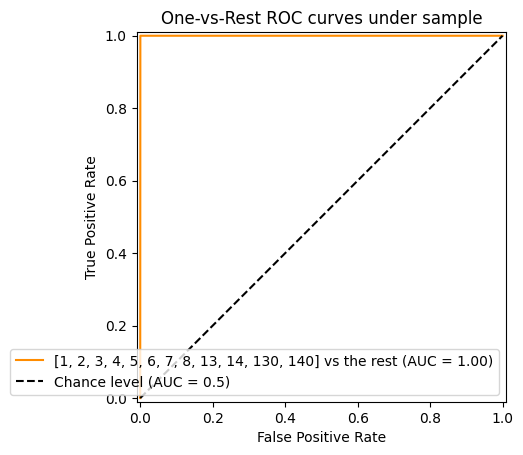

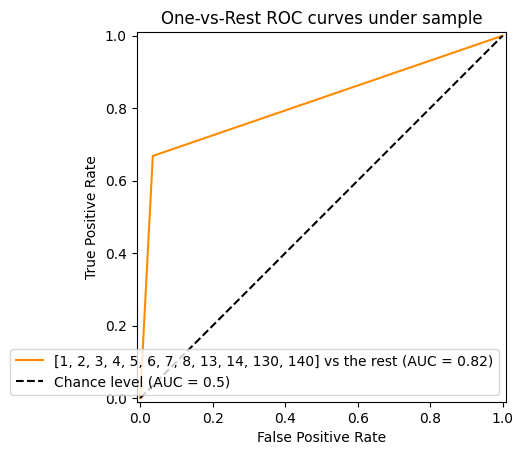

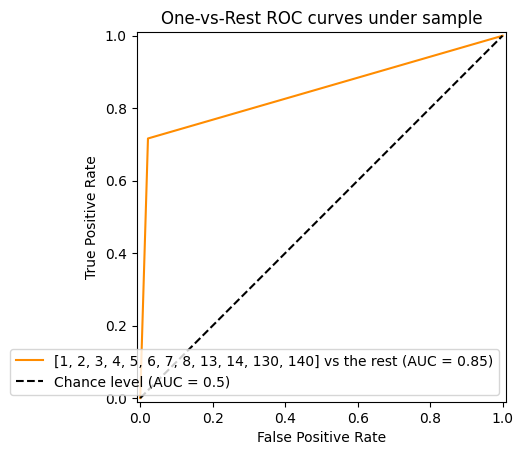

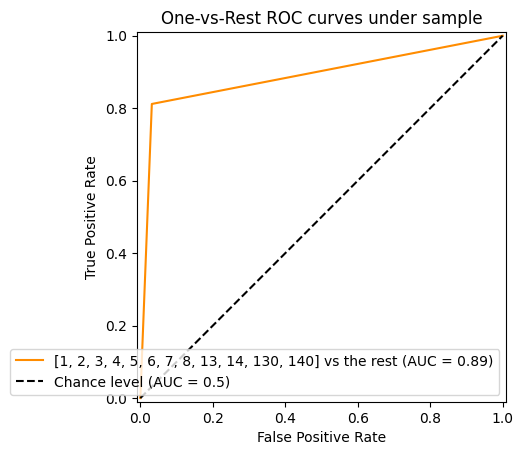

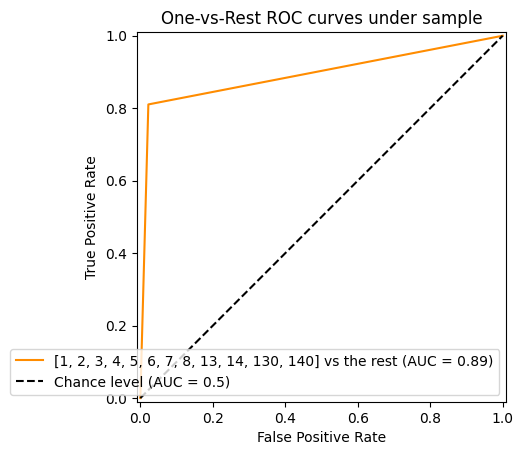

In [92]:
#ROC ON undersample DATA 
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay
for class_id in classes:  
    display = RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred_classes_bin[:, class_id],
        name=f"{class_labels} vs the rest",
        color="darkorange",
        plot_chance_level=True,
    )
    _ = display.ax_.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title="One-vs-Rest ROC curves under sample",
    )

<h2>Hyper parameter tuning </h2>

<h3>using gridsearch </h3>

In [8]:
from sklearn.model_selection import GridSearchCV

<ul>We will use three hyperparamters- n-neighbors, weights and metric
<li>n_neighbors: Decide the best k based on the values we have computed earlier.</li>
<li>weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.</li>
<li>metric: The distance metric to be used will calculating the similarity.</li>
</ul>

In [9]:
grid_params = { 'n_neighbors' : [3,5,7],
               'weights' : ['uniform','distance'],
               'algorithm':['auto','kd_tree','brute'],
               'metric' : ['euclidean']}

In [20]:
gs = GridSearchCV(knn, grid_params, verbose = 1, cv=2, n_jobs = -1)

In [ ]:
g_res = gs.fit(X_val, y_val)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


In [ ]:
best_params=g_res.best_params_
print("Best params",best_params)

In [ ]:
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(X_train, y_train)

<b>Remark on the grid search : </b>
The grid shearch took so much and could not give any result 

<h3>Using  loop </h3>

In [12]:
# Instantiate a KNN model (replace with your actual model)
knn = KNeighborsClassifier()

# Best model and score will be initialized to None for tracking
best_model = None
best_accuracy = None
n_neighbors = [3, 5, 7]
weights_options = ['uniform', 'distance']
algorithm_options = ['auto', 'kd_tree', 'brute']
metric_options = ['euclidean']
#Loop through hyperparameter combinations
for n_neighbor in n_neighbors:
    for weights in weights_options:
        for algorithm in algorithm_options:
            for metric in metric_options:
                # Create a model with current hyperparameter combination
                current_model = KNeighborsClassifier(n_neighbors=n_neighbor,
                                                     weights=weights,
                                                     algorithm=algorithm,
                                                     metric=metric)

                # Train the model on your validation data (replace X_val, y_val with yours)
                current_model.fit(X_val, y_val)

                y_pred = current_model.predict(X_test)
                current_accuracy = accuracy_score(y_test, y_pred)

                # Update best model and score if current one is better
                if best_accuracy is None or current_accuracy > best_accuracy:
                    best_model = current_model
                    best_accuracy = current_accuracy

                print(f"n_neighbors: {n_neighbor}, weights: {weights}, algorithm: {algorithm}, metric: {metric}, accuracy: {current_accuracy}")

n_neighbors: 3, weights: uniform, algorithm: auto, metric: euclidean, accuracy: 0.8857872472141973
n_neighbors: 3, weights: uniform, algorithm: kd_tree, metric: euclidean, accuracy: 0.8857872472141973
n_neighbors: 3, weights: uniform, algorithm: brute, metric: euclidean, accuracy: 0.8857872472141973
n_neighbors: 3, weights: distance, algorithm: auto, metric: euclidean, accuracy: 0.8831427981840694
n_neighbors: 3, weights: distance, algorithm: kd_tree, metric: euclidean, accuracy: 0.8831427981840694
n_neighbors: 3, weights: distance, algorithm: brute, metric: euclidean, accuracy: 0.8831427981840694
n_neighbors: 5, weights: uniform, algorithm: auto, metric: euclidean, accuracy: 0.8895264135369377
n_neighbors: 5, weights: uniform, algorithm: kd_tree, metric: euclidean, accuracy: 0.8895264135369377
n_neighbors: 5, weights: uniform, algorithm: brute, metric: euclidean, accuracy: 0.8895264135369377
n_neighbors: 5, weights: distance, algorithm: auto, metric: euclidean, accuracy: 0.88888258357

In [13]:
# Print the best hyperparameter combination and corresponding score
print("Best hyperparameters:", best_model.get_params())
print("Best accuracy:", best_accuracy)

Best hyperparameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
Best score: 0.8910813041683863


In [14]:
best_params=best_model.get_params()
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

Training the best model we got on full dataset

In [17]:
knn_best=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                                metric_params=None, n_jobs=None,n_neighbors= 7, 
                                p=2, weights ='distance')
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print(f"KNN Model Accuracy on Test Set: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

KNN Model Accuracy on Test Set: 0.8986
Precision: 0.7294
Recall: 0.6680
F1-score: 0.6883


In [22]:
#classification report 
print("Classification report on all dataset :\n",classification_report(y_test, y_pred))

Classification report on all dataset :
               precision    recall  f1-score   support

           1       0.80      0.86      0.83    179755
           2       0.92      0.89      0.90     43629
           3       0.51      0.37      0.43     38315
           4       0.52      0.31      0.39     11438
           5       0.44      0.14      0.22      9912
           6       0.83      0.90      0.86    111147
           7       1.00      1.00      1.00    435733
           8       1.00      1.00      1.00     64398
          13       0.82      0.87      0.85     59086
          14       0.70      0.60      0.65      8335
         130       0.59      0.55      0.57      6279
         140       0.62      0.53      0.57      1173

    accuracy                           0.90    969200
   macro avg       0.73      0.67      0.69    969200
weighted avg       0.89      0.90      0.89    969200



<h2>Conclusion </h2>

In this study, we conducted a comprehensive analysis of Human Activity Recognition (HAR) using various machine learning algorithms. Our workflow included data understanding, model comparison, evaluation of activation functions, and assessment using multiple performance metrics.

<b>Best Model</b>

The Knn with  undersampled (balanced) data was the best-performing model, effectively addressing class imbalance and providing robust classification results.

<b>Future Directions</b>

- Exploring ensemble methods and advanced deep learning architectures.
- Investigating additional feature engineering techniques.

<h2>Appendix </h2>

<a href="https://docs.google.com/spreadsheets/d/1r-lsFy8_4Z7M_H4uqUDfuN-2W03zvwVNyuQN0tANetA/edit?usp=sharing">Results link </a>